In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [ ]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 6s 0us/step


In [ ]:
train_images, test_images = train_images / 255.0, test_images / 255.0

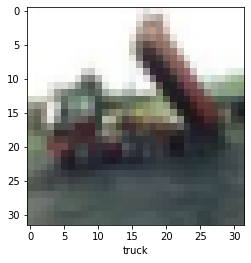

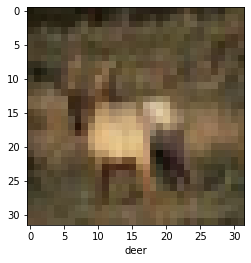

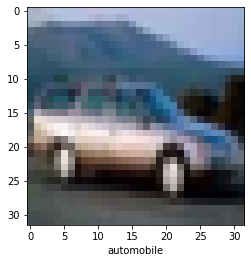

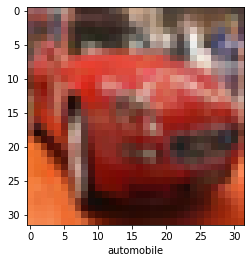

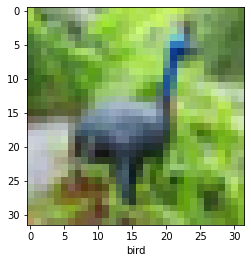

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

for i in range(2,7):
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i][0]])
    plt.show()

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
Total params: 56,320
Trainable params: 56,320
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(10))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 64)               

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 58s 37ms/step - loss: 1.5573 - accuracy: 0.4304 - val_loss: 1.3809 - val_accuracy: 0.5209
Epoch 2/10
1563/1563 [==============================] - 58s 37ms/step - loss: 1.1809 - accuracy: 0.5810 - val_loss: 1.1395 - val_accuracy: 0.5925
Epoch 3/10
1563/1563 [==============================] - 58s 37ms/step - loss: 1.0261 - accuracy: 0.6410 - val_loss: 0.9771 - val_accuracy: 0.6569
Epoch 4/10
1563/1563 [==============================] - 61s 39ms/step - loss: 0.9233 - accuracy: 0.6751 - val_loss: 0.9195 - val_accuracy: 0.6766
Epoch 5/10
1563/1563 [==============================] - 58s 37ms/step - loss: 0.8460 - accuracy: 0.7046 - val_loss: 0.9242 - val_accuracy: 0.6824
Epoch 6/10
1563/1563 [==============================] - 58s 37ms/step - loss: 0.7859 - accuracy: 0.7240 - val_loss: 0.8750 - val_accuracy: 0.7008
Epoch 7/10
1563/1563 [==============================] - 58s 37ms/step - loss: 0.7346 - accuracy: 0.7445 - val_loss: 0.8664 -

In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

313/313 - 3s - loss: 0.8836 - accuracy: 0.7006


In [ ]:
test_acc

0.7006000280380249

In [ ]:
import numpy as np

This image most likely belongs to truck with a 96.90 percent confidence.


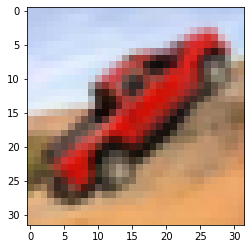

In [ ]:
img = train_images[140]
plt.imshow(train_images[140], cmap=plt.cm.binary)

img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)